### Importing dependices

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [11]:
df = pd.read_csv('train.csv')

In [68]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [55]:
#display all columns of dataframe without any column being truncated
pd.set_option('display.max_columns',None)

 ### EDA

In [16]:
df.shape

(800, 22)

In [49]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [51]:
df.nunique()

ID                 800
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                800
gender               2
ethnicity           12
jaundice             2
austim               2
contry_of_res       56
used_app_before      2
result             800
age_desc             1
relation             6
Class/ASD            2
dtype: int64

In [53]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [59]:
#convert age column to integer

df['age'] = df['age'].astype(int)

In [64]:
for col in df.columns:
    print(col)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
ethnicity
jaundice
austim
contry_of_res
used_app_before
result
age_desc
relation
Class/ASD


In [66]:
 for col in df.columns:
     numerical_features = ['ID','result','result']
     if col not in numerical_features:
         print(col,df[col].unique())
         print("."*50)

A1_Score [1 0]
..................................................
A2_Score [0 1]
..................................................
A3_Score [1 0]
..................................................
A4_Score [0 1]
..................................................
A5_Score [1 0]
..................................................
A6_Score [0 1]
..................................................
A7_Score [1 0]
..................................................
A8_Score [0 1]
..................................................
A9_Score [1 0]
..................................................
A10_Score [1 0]
..................................................
gender ['f' 'm']
..................................................
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
..................................................
jaundice ['no' 'yes']
..................................................
austim

In [70]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [76]:
# define the mapping dictionary for country names

mapping = {
    'Viet Nam':'Vietnam',
    'AmericanSamoa':'Unites States',
    'Hong Kong':'China'
}
#replace values in country columns
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [78]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Unites States', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China',
       'Angola', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [80]:
#target class distribution
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [84]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [88]:
print(df['ID'])

0        1
1        2
2        3
3        4
4        5
      ... 
795    796
796    797
797    798
798    799
799    800
Name: ID, Length: 800, dtype: int64


In [92]:
print(df['age_desc'])

0      18 and more
1      18 and more
2      18 and more
3      18 and more
4      18 and more
          ...     
795    18 and more
796    18 and more
797    18 and more
798    18 and more
799    18 and more
Name: age_desc, Length: 800, dtype: object


##### since  id and age_desc don't make any sense to us so we drop them
because id is just continuos nos from 0 to 800 and age_desc is having only 1 category 18 and more so its of no use

In [100]:
df = df.drop(columns=['ID','age_desc'])


In [102]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


### Univariate analysis

#### Numerical columns:
1. age
2. result
  

In [110]:
#set the desired theme
#sns.set_theme(style='darkgrid')

##### Distribution plots

Mean: 27.96375
Median: 24.0


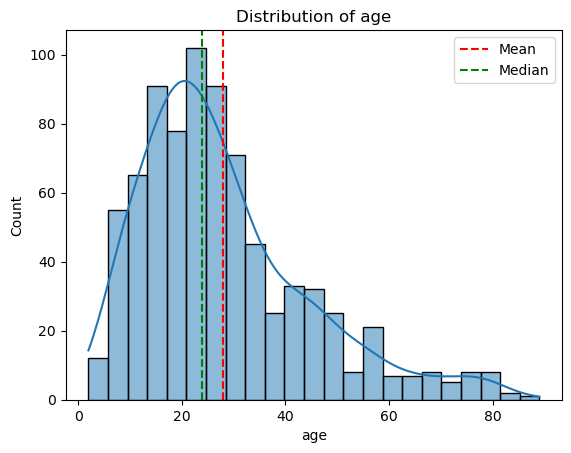

In [127]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of age')

age_mean = df['age'].mean()
age_median = df['age'].median()
print('Mean:',age_mean)
print('Median:',age_median)
plt.axvline(age_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(age_median,color='green',linestyle='dashed',label='Median')

plt.legend()


plt.show()

Mean: 8.537303106501248
Median: 9.605299308


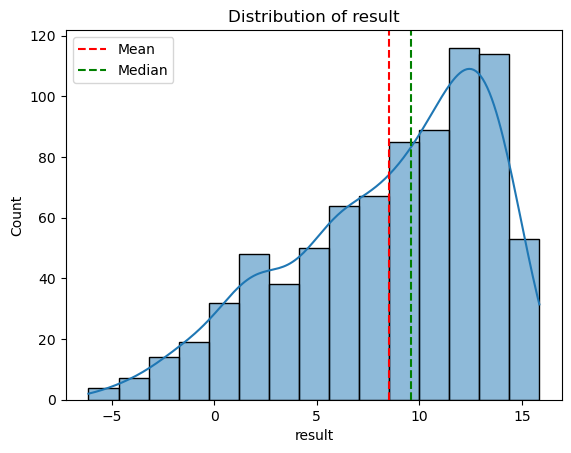

In [131]:
sns.histplot(df['result'],kde=True)
plt.title('Distribution of result')

result_mean = df['result'].mean()
result_median = df['result'].median()
print('Mean:',result_mean)
print('Median:',result_median)
plt.axvline(result_mean,color='red',linestyle='dashed',label='Mean')
plt.axvline(result_median,color='green',linestyle='dashed',label='Median')

plt.legend()


plt.show()

#### Box plots for identifying outliers in numerical columns

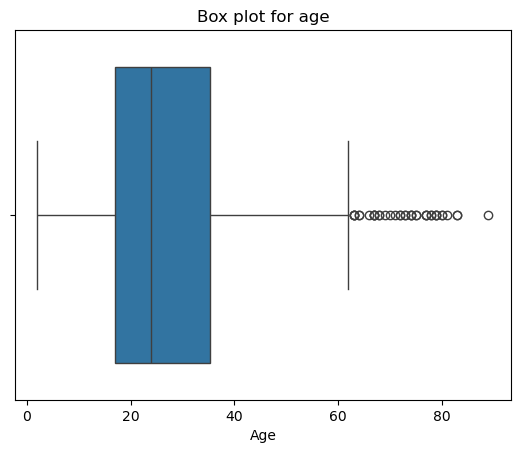

In [155]:
sns.boxplot(x=df['age'])
plt.title('Box plot for age')
plt.xlabel('Age')
plt.show()

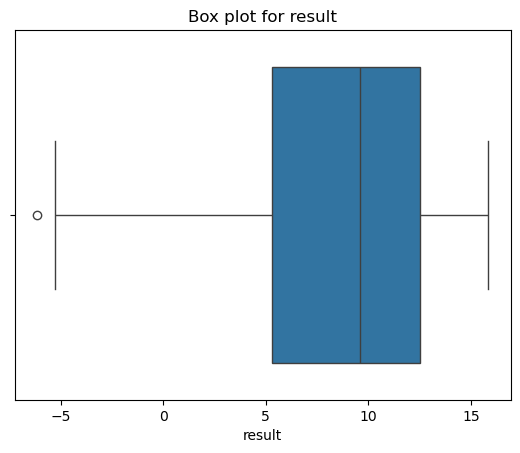

In [157]:
sns.boxplot(x=df['result'])
plt.title('Box plot for result')
plt.xlabel('result')
plt.show()

In [159]:
# count the outliers using IQR method

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age']<lower_bound)|(df['age']>upper_bound)]


In [161]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [163]:
len(age_outliers)

39

In [165]:
# count the outliers using IQR method

Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result']<lower_bound)|(df['result']>upper_bound)]


In [167]:
len(result_outliers)

1

#### Univariate analysis of Categorical columns

In [172]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

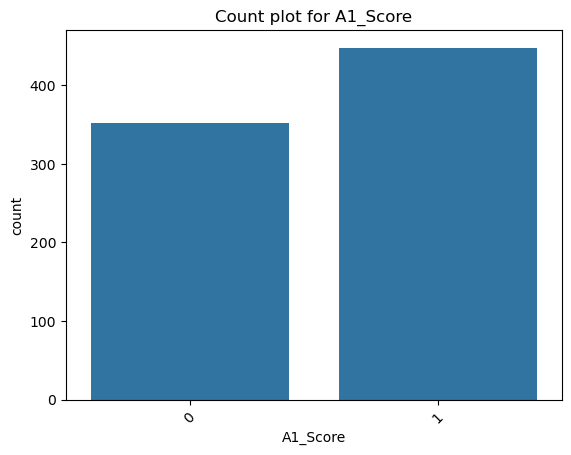

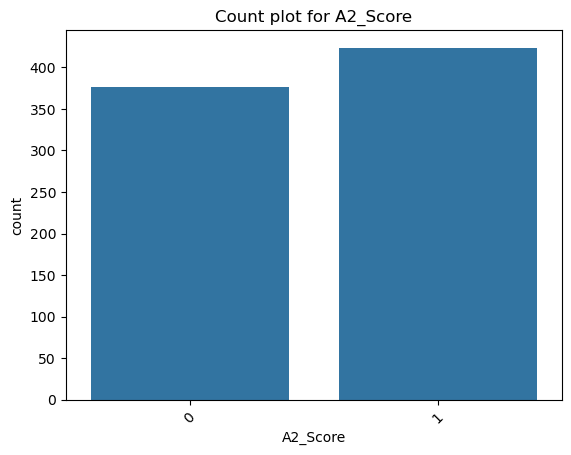

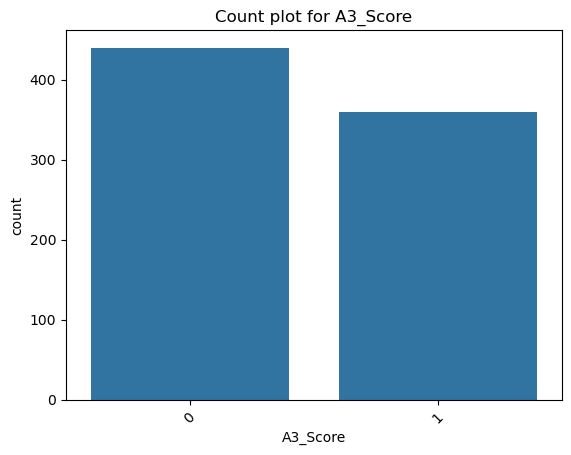

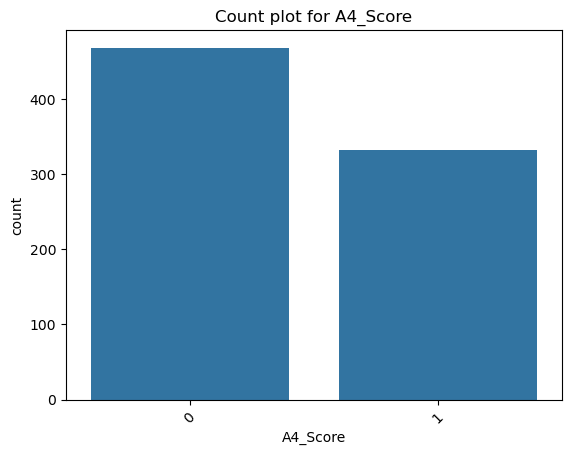

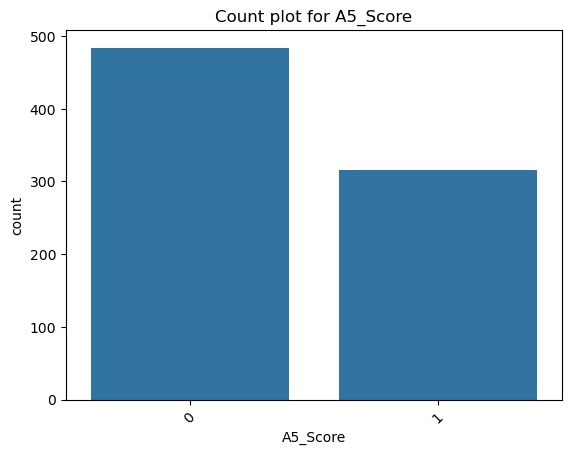

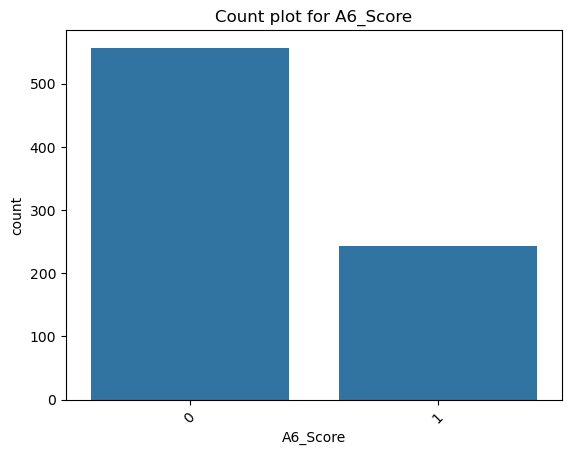

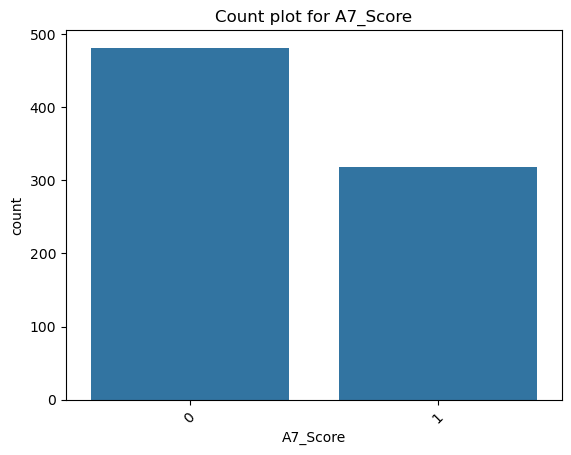

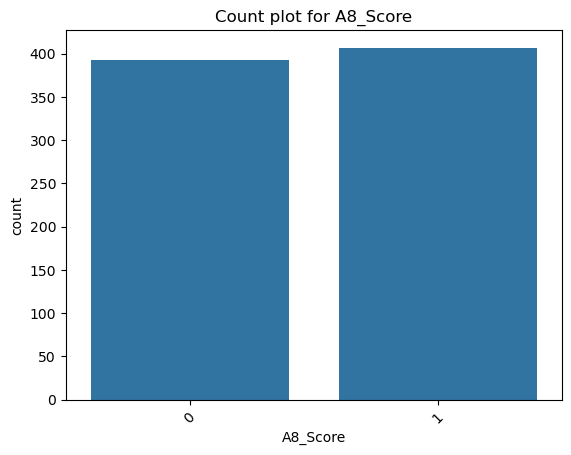

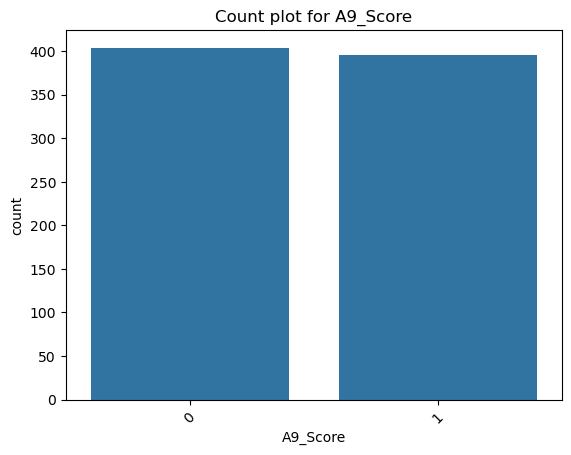

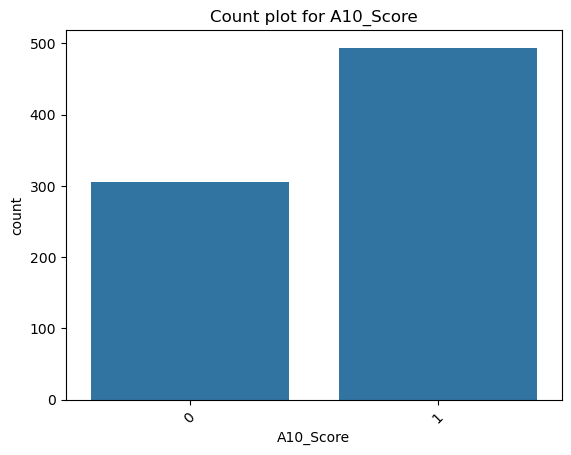

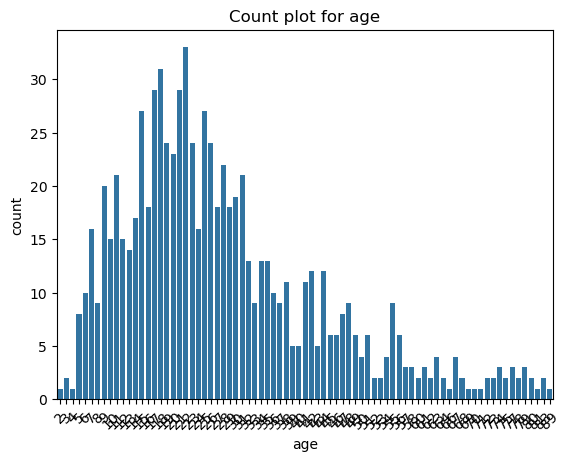

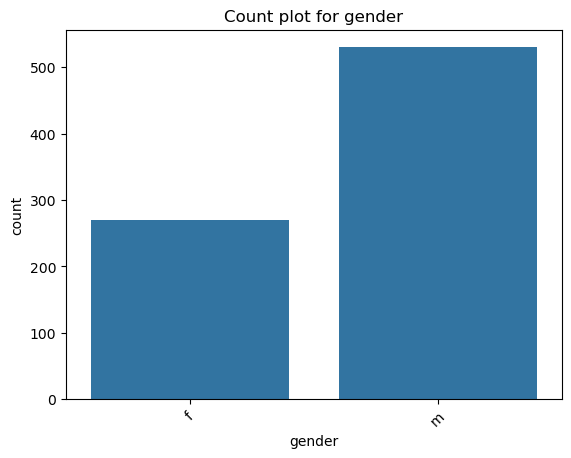

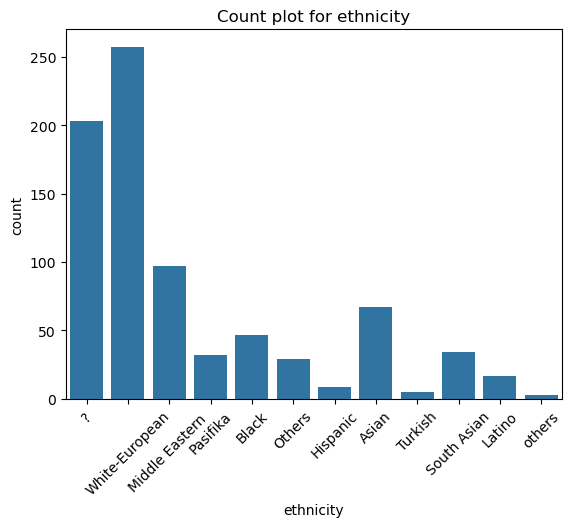

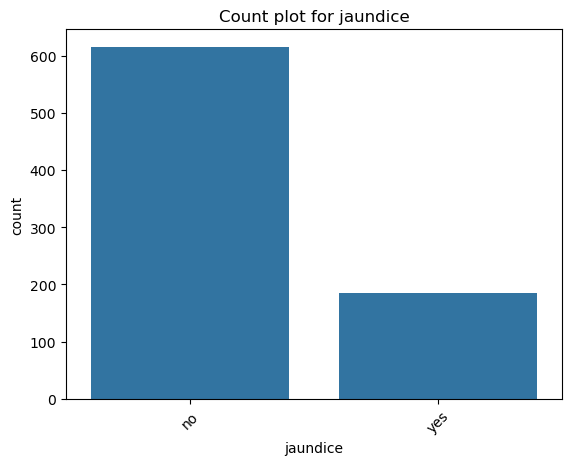

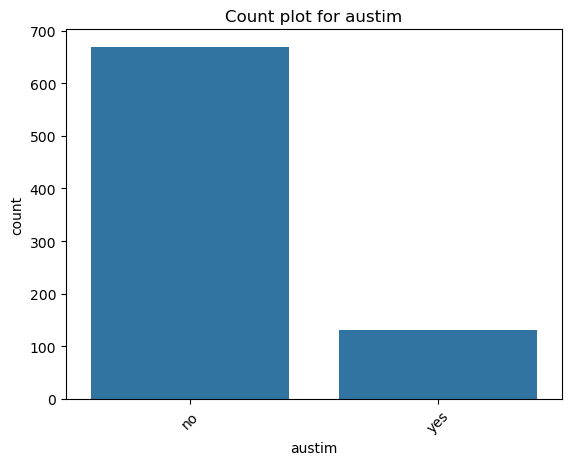

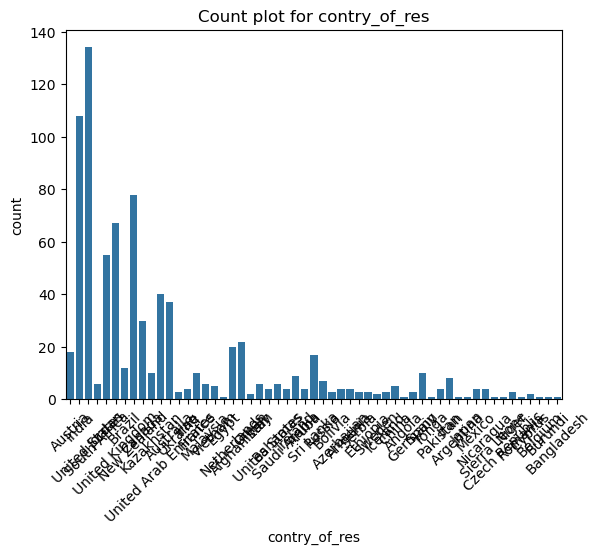

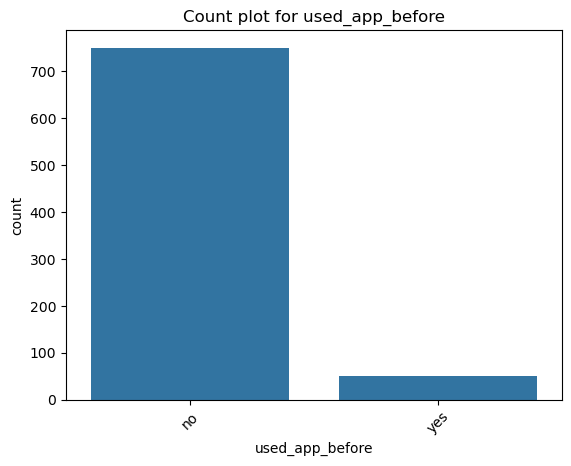

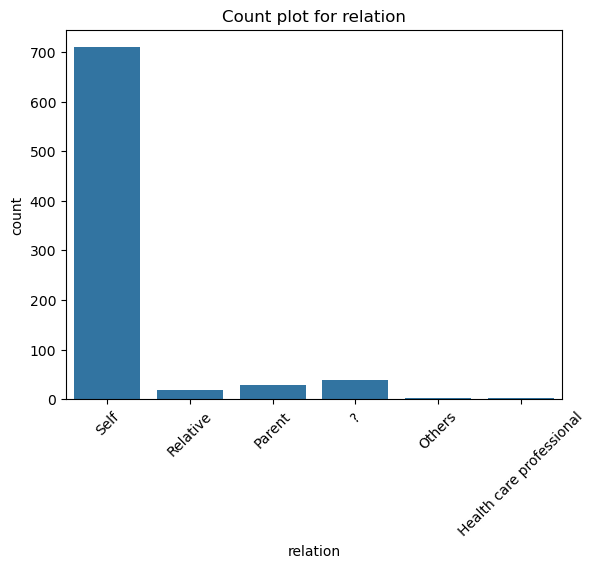

In [176]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'Count plot for {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.show()

#### Countplot for target columns(class/ASD)

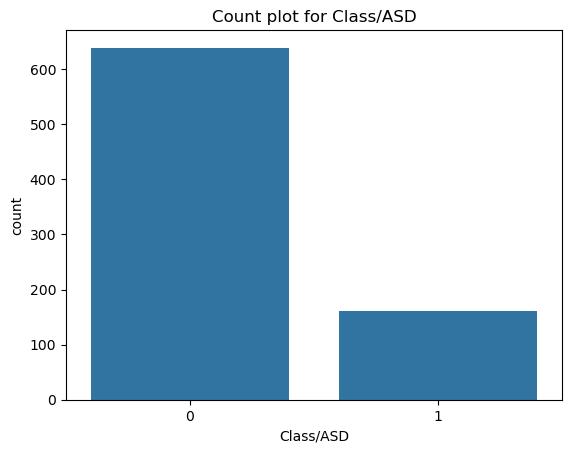

In [179]:
sns.countplot(x=df['Class/ASD'])
plt.title('Count plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.show()

In [181]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Handling missing values

In [183]:
columns_with_question_marks = df.columns[df.isin(['?']).any()]
print(columns_with_question_marks)

Index(['ethnicity', 'relation'], dtype='object')


In [185]:
for col in df.columns:
    if df[col].isin(['?']).any():
        print(col)
        print(df[col].value_counts())
        print("-" * 30)

ethnicity
ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64
------------------------------
relation
relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64
------------------------------


In [189]:
df['ethinicity'] = df['ethnicity'].replace({'?':'Others','others':'Others'})

In [191]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [193]:
df['relation'] = df['relation'].replace(
    {'?':'Others','Relative':'Others',
     'Parent':'Others',
     'Health care professional':'Others',
     
    })

In [195]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

#### Label encoding

In [198]:
# identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

In [200]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'ethinicity'],
      dtype='object')


In [210]:
# intialise a dicitonary to store encoders

encoder = {}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoder[column] = label_encoder #saving encoder for this column

with open('encoders.pkl','wb') as f:
    pickle.dump(encoder,f)


In [214]:
encoder

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder(),
 'ethinicity': LabelEncoder()}

In [220]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,ethinicity
0,1,0,1,0,1,0,1,0,1,1,38,0,0,0,0,6,0,6.351166,1,0,5
1,0,0,0,0,0,0,0,0,0,0,47,1,0,0,0,23,0,2.255185,1,0,5
2,1,1,1,1,1,1,1,1,1,1,7,1,10,0,1,52,0,14.851484,1,1,9
3,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,52,0,2.276617,1,0,5
4,0,0,0,0,0,0,0,0,0,0,43,1,0,0,0,44,0,-4.777286,1,0,5


### Bivariate analysis

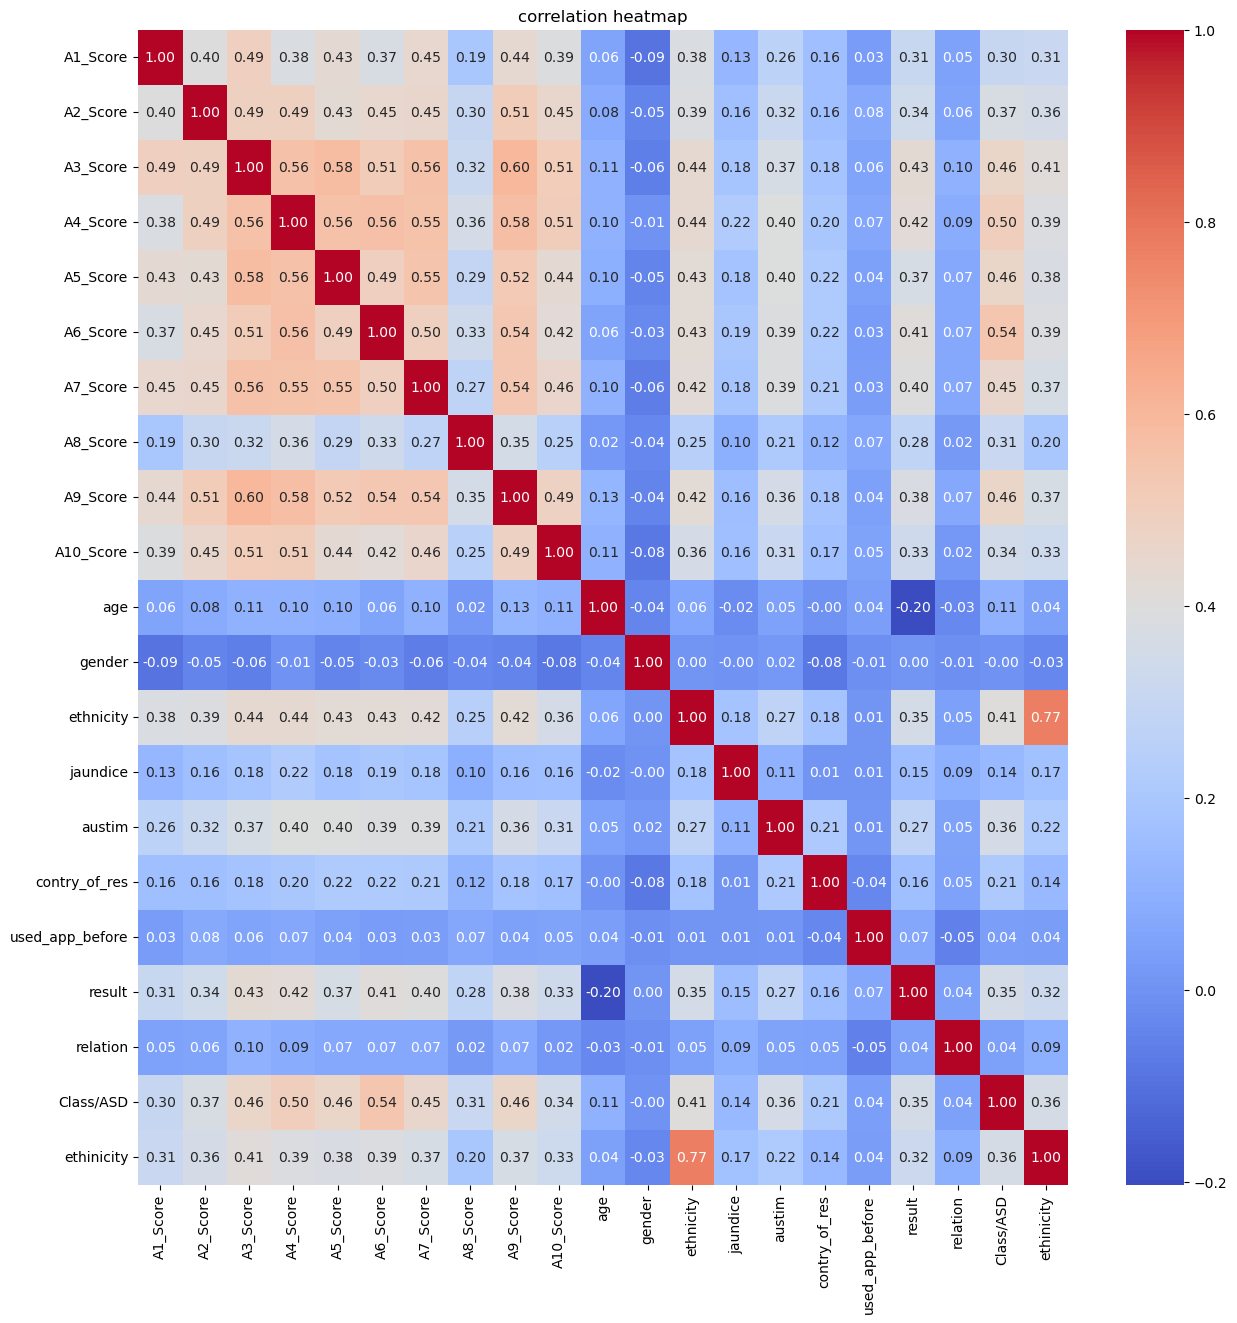

In [229]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',fmt ='.2f')
plt.title('correlation heatmap')
plt.show()

#### Insights from EDA
1. There are outliers present in numerical columns(age,results)
2. There is a class imbalance in the target column
3. There is a class imbalance in categorical features
4. We dont have any highly correlated column
5. performed label encoding and saved the encoders

### Data preprocessing

#### Handling outliers

In [234]:
# function to replace outliers with median

def replace_outliers_with_median(df,column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()

        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
        return df

In [238]:
# replace outliers in age column

df = replace_outliers_with_median(df,'age')

df = replace_outliers_with_median(df,'result')

In [240]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,ethinicity
0,1,0,1,0,1,0,1,0,1,1,38.0,0,0,0,0,6,0,6.351166,1,0,5
1,0,0,0,0,0,0,0,0,0,0,47.0,1,0,0,0,23,0,2.255185,1,0,5
2,1,1,1,1,1,1,1,1,1,1,7.0,1,10,0,1,52,0,14.851484,1,1,9
3,0,0,0,0,0,0,0,0,0,0,23.0,0,0,0,0,52,0,2.276617,1,0,5
4,0,0,0,0,0,0,0,0,0,0,43.0,1,0,0,0,44,0,-4.777286,1,0,5


In [244]:
df.shape

(800, 21)

### Train test split

In [247]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD', 'ethinicity'],
      dtype='object')

In [249]:
x = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [251]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [253]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [257]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [261]:
print(x_train.shape)
print(x_test.shape)

(640, 20)
(160, 20)


In [263]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [265]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [267]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

### SMOTE(Synthetic minor oveersampling technique) for correcting imbalance

In [271]:
smote = SMOTE(random_state  = 42)

In [273]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [275]:
print(y_train_smote.shape)

(1030,)


In [277]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


### Model Training

In [285]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [287]:
# dictionary to store the cross validation results
cv_scores = {}

#perform 5 fold cross validation for each model

for model_name,model in models.items():
    print(f'training{model_name} with default parameters')
    scores = cross_val_score(model,x_train_smote,y_train_smote,cv = 5,scoring = 'accuracy')
    cv_scores[model_name]=scores
    print(f'{model_name}Cross validation accuracy:{np.mean(scores): .2f}')
    print("-"*50)

trainingDecision Tree with default parameters
Decision TreeCross validation accuracy: 0.87
--------------------------------------------------
trainingRandom Forest with default parameters
Random ForestCross validation accuracy: 0.91
--------------------------------------------------
trainingXGBoost with default parameters
XGBoostCross validation accuracy: 0.90
--------------------------------------------------


In [289]:
cv_scores

{'Decision Tree': array([0.83009709, 0.86407767, 0.87378641, 0.87378641, 0.88834951]),
 'Random Forest': array([0.89805825, 0.9368932 , 0.90776699, 0.91747573, 0.91262136]),
 'XGBoost': array([0.85436893, 0.94174757, 0.90291262, 0.89320388, 0.89805825])}

### Model selection and hyper parameter tuning

In [311]:
# initialising models
decision_tree= DecisionTreeClassifier(random_state=42)
random_forest= RandomForestClassifier(random_state=42)
xgboost= XGBClassifier(random_state=42)

In [313]:
# Hyperparameter grids for randomized search cv

param_grid_dt = {
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30,50,70],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

param_grid_rf = {
    'n_estimators' : [50,100,200,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}

param_grid_xgb = {
    'n_estimators' : [50,100,200,500],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.5,0.7,1.0],
    'colsample_bytree':[0.5,0.7,1.0]
    
}

In [315]:
# performing hyperparameter tuning for 3 tree based models
# the below steps can be automated by using for loop
#perform randomized search cv for each model

random_search_dt = RandomizedSearchCV(estimator = decision_tree,param_distributions = param_grid_dt, n_iter = 20, cv = 5, scoring = 'accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator = random_forest,param_distributions = param_grid_rf,n_iter = 20,cv = 5,scoring = 'accuracy',random_state = 42)
random_search_xgb = RandomizedSearchCV(estimator = xgboost,param_distributions = param_grid_xgb,n_iter = 20,cv = 5,scoring = 'accuracy',random_state = 42)
#random_search_dt.fit(X_train_smote,y_train_smote)

In [317]:

random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [321]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
0.8728155339805825
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50, random_state=42)
0.9145631067961165


In [327]:
# get the model with best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [329]:
print(f'Best model:{best_model}')
print(f'Best cross validation accuracy:{best_score: .2f}')

Best model:RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50, random_state=42)
Best cross validation accuracy: 0.91


In [331]:
#save the best model

with open('best_model.pkl','wb') as f:
    pickle.dump(best_model,f)

### Model Evaluation

In [338]:
#evaluate on test data
y_test_pred = best_model.predict(x_test)
print('Accuracy score:\n',accuracy_score(y_test,y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_test_pred))
print('Classification report:\n',classification_report(y_test,y_test_pred))

Accuracy score:
 0.825
Confusion matrix:
 [[110  14]
 [ 14  22]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       124
           1       0.61      0.61      0.61        36

    accuracy                           0.82       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

